In [2]:
import pandas as pd
df = pd.read_csv('NLP_DATASET.csv', encoding='ISO-8859-1')
df

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0.0,0.0,4.0,7.0,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0.0,1.0,4.0,7.0,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1.0,0.0,4.0,4.0,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1.0,1.0,4.0,4.0,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1.0,2.0,4.0,4.0,"00:12:34,211","00:12:37,505"
...,...,...,...,...,...,...,...,...,...,...,...
358,374,I'm sure that would mean a lot to him.,Chandler,neutral,neutral,31.0,3.0,9.0,17.0,"00:22:22,120","00:22:25,749"
359,375,"And if heaven has a door, I'm sure he's pre...",Chandler,neutral,neutral,31.0,4.0,9.0,17.0,"00:22:25,916","00:22:31,671"
360,376,I thought so many times about calling him and ...,Kori,sadness,negative,31.0,5.0,9.0,17.0,"00:22:33,507","00:22:39,554"
361,377,But you didn't!,Ross,joy,positive,31.0,6.0,9.0,17.0,"00:22:39,971","00:22:42,265"


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = {
    "Sr No.": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Utterance": [
        "Oh my God, heâ€™s lost it. Heâ€™s totally lost it.",
        "What?",
        "Or! Or, we could go to the bank, close our accounts and cut them off at the source.",
        "Youâ€™re a genius!",
        "Aww, man, now we wonâ€™t be bank buddies!",
        "Now, thereâ€™s two reasons.",
        "Hey.",
        "Hey!",
        "Ohh, you guys, remember that cute client I told you about? I bit him.",
        "Where?!"
    ],
    "Speaker": ["Phoebe", "Monica", "Ross", "Chandler", "Joey", "Chandler", "Phoebe", "All", "Phoebe", "Rachel"],
    "Emotion": ["sadness", "surprise", "neutral", "joy", "sadness", "neutral", "neutral", "joy", "neutral", "surprise"],
    "Sentiment": ["negative", "negative", "neutral", "positive", "negative", "neutral", "neutral", "positive", "neutral", "negative"],
    "Dialogue_ID": [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    "Utterance_ID": [0, 1, 0, 1, 2, 3, 4, 5, 6, 7],
    "Season": [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    "Episode": [7, 7, 4, 4, 4, 4, 4, 4, 4, 4],
    "StartTime": ["00:20:57,256", "00:21:01,927", "00:12:24,660", "00:12:32,334", "00:12:34,211", "00:12:38,466", "0:12:43,012", "0:12:44,074", "00:12:45,347", "0:12:52,730"],
    "EndTime": ["00:21:00,049", "00:21:03,261", "00:12:30,915", "00:12:33,960", "00:12:37,505", "00:12:39,841", "0:12:44,074", "0:12:45,189", "00:12:50,852", "0:12:55,002"]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

Dataset:
   Sr No.                                          Utterance   Speaker  \
0       1  Oh my God, heâ€™s lost it. Heâ€™s totally lost...    Phoebe   
1       2                                              What?    Monica   
2       3  Or! Or, we could go to the bank, close our acc...      Ross   
3       4                                 Youâ€™re a genius!  Chandler   
4       5          Aww, man, now we wonâ€™t be bank buddies!      Joey   
5       6                        Now, thereâ€™s two reasons.  Chandler   
6       7                                               Hey.    Phoebe   
7       8                                               Hey!       All   
8       9  Ohh, you guys, remember that cute client I tol...    Phoebe   
9      10                                            Where?!    Rachel   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   sadness  negative            0             0       4        7   
1  surprise  negative            0    

In [6]:
df.isnull().sum()

Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64

In [7]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, heâ€™s lost it. Heâ€™s totally lost...",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youâ€™re a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wonâ€™t be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [8]:
# Encode the target variable (Sentiment)
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [9]:
# Features (text data) and target variable
X = df['Utterance']  # Text data
y = df['Sentiment']  # Sentiment labels

# Use the entire dataset for training and testing
X_train, X_test, y_train, y_test = X, X, y, y  # Train and test on the same data

In [10]:
# Convert text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
# Predict on the test set (which is the same as the training set)
y_pred = model.predict(X_test_vec)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")



Accuracy: 90.00%


In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4 0 0]
 [0 4 0]
 [0 1 1]]


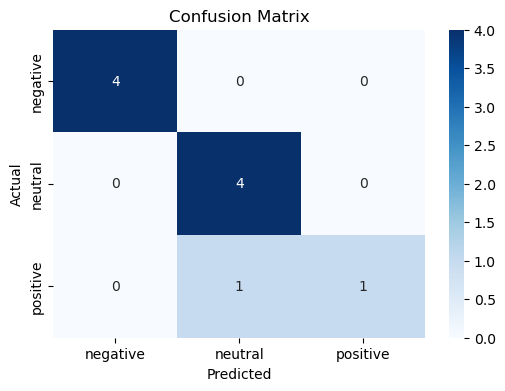

In [15]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Classification Report
unique_classes = label_encoder.inverse_transform(sorted(set(y_test)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=unique_classes))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         4
     neutral       0.80      1.00      0.89         4
    positive       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.93      0.83      0.85        10
weighted avg       0.92      0.90      0.89        10



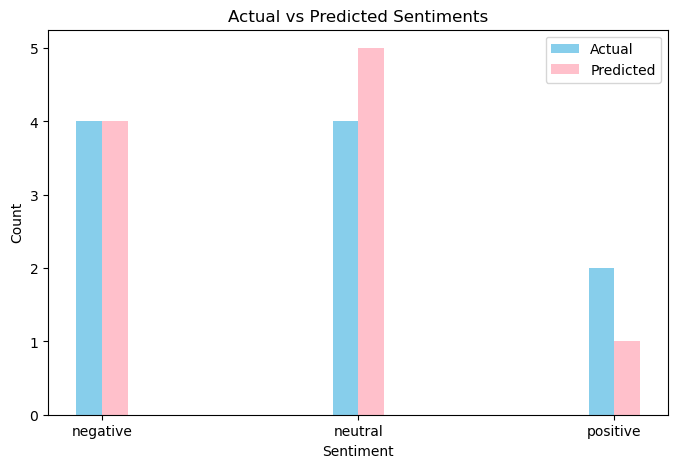

In [17]:
# Distribution of Predicted vs Actual Sentiments (Bar Plot)
plt.figure(figsize=(8, 5))
# Count of actual sentiments
actual_counts = pd.Series(y_test).value_counts().sort_index()
# Count of predicted sentiments
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Create a bar plot
bar_width = 0.1
index = range(len(unique_classes))

plt.bar(index, actual_counts, bar_width, color='skyblue', label='Actual')
plt.bar([i + bar_width for i in index], predicted_counts, bar_width, color='pink', label='Predicted')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Actual vs Predicted Sentiments')
plt.xticks([i + bar_width / 2 for i in index], unique_classes)
plt.legend()
plt.show()